In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv


In [60]:
df = pd.read_csv('/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv')

In [61]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [62]:
df.shape

(10000, 9)

In [63]:
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


# Data Cleaning

In [65]:
# dropping id column
df.drop(columns=['id','full_name'], axis = 1 , inplace =  True)

In [66]:
df_obj = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

In [67]:
# replacing null value with most occured values for that col
for col in df_obj:
    df[col].fillna(df[col].mode()[0],inplace = True)

In [68]:
# replacing null val with mean of that col
for col in df_num:
    df[col].fillna(df[col].mean(), inplace = True)

In [69]:
df.isnull().sum()

age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [70]:
#statistical overview
df.describe()

,age,click
count,10000.000000,10000.000000
mean,40.197363,0.650000
std,9.496059,0.476993
min,18.000000,0.000000
25%,38.000000,0.000000
50%,40.197363,1.000000
75%,40.197363,1.000000
max,64.000000,1.000000


# Visualization

Text(0, 0.5, '')

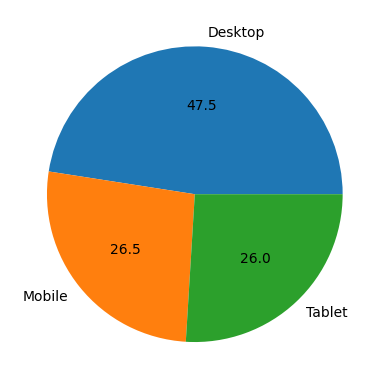

In [73]:
df['device_type'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

**Count plot for categorical columns**

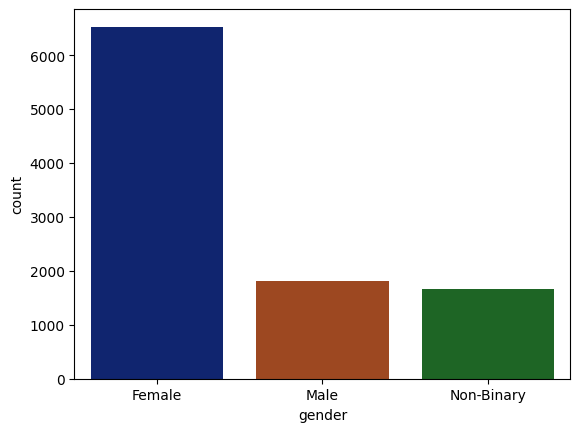

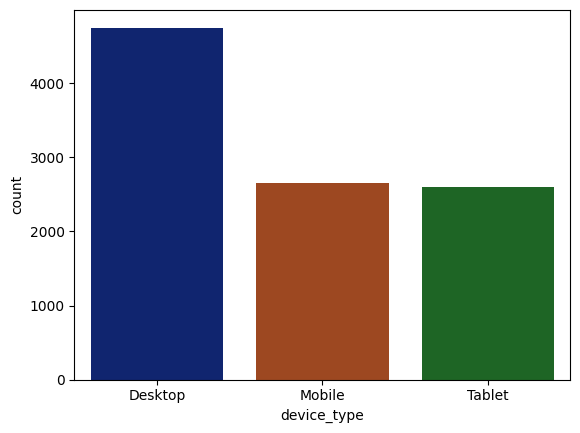

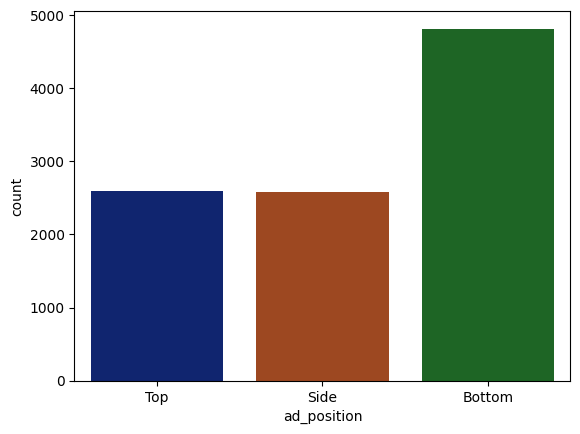

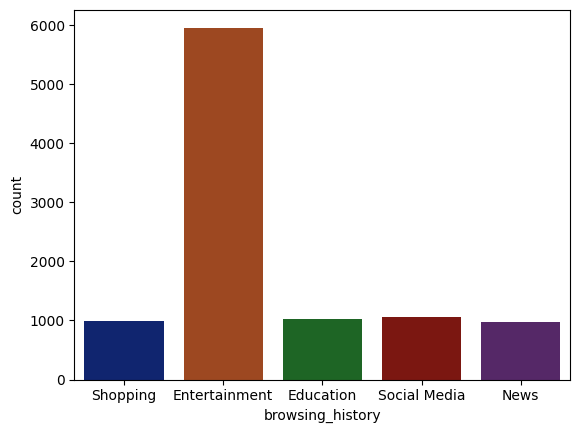

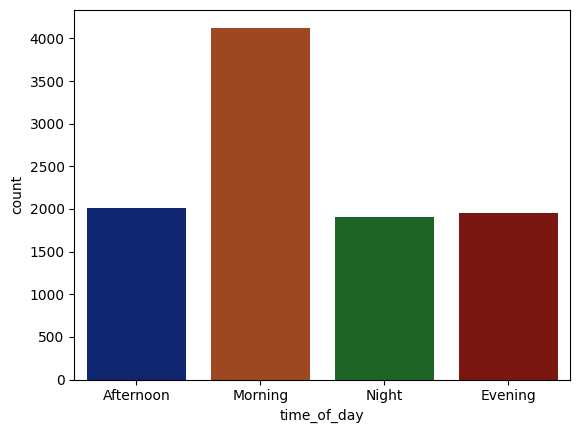

In [77]:
for col in df_obj:
    sns.countplot(x = col, data = df, palette = 'dark')
    plt.show()

In [78]:
df_num

,age,click
0,22.0,1
1,NaN,1
2,41.0,1
3,34.0,1
4,39.0,0
...,...,...
9995,NaN,0
9996,NaN,0
9997,NaN,0
9998,NaN,1


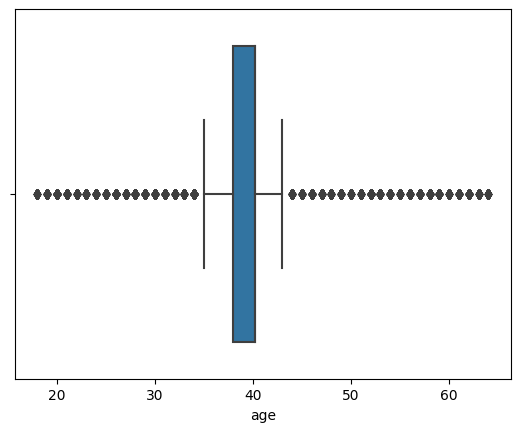

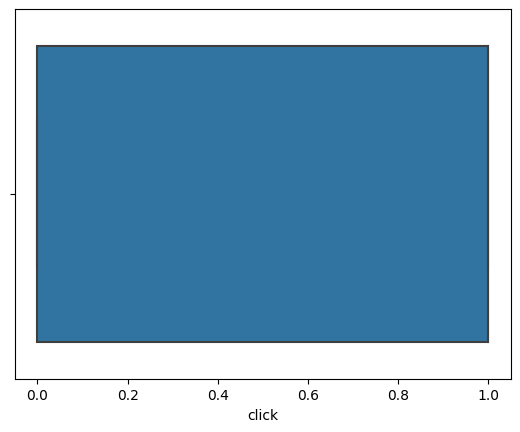

In [81]:
for col in df_num:
    sns.boxplot(x = col, data = df)
    plt.show()

# Model Training

In [83]:
df.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.000000,Female,Desktop,Top,Shopping,Afternoon,1
1,40.197363,Male,Desktop,Top,Entertainment,Morning,1
2,41.000000,Non-Binary,Desktop,Side,Education,Night,1
3,34.000000,Male,Desktop,Bottom,Entertainment,Evening,1
4,39.000000,Non-Binary,Desktop,Bottom,Social Media,Morning,0


In [85]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [86]:
scaler = StandardScaler()
le = LabelEncoder()

In [89]:
for col in df_obj:
    df[col] = le.fit_transform(df[col])

In [93]:
df['age'] = scaler.fit_transform(df[['age']])

In [115]:
df.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,-1.916403,0,0,2,3,0,1
1,0.000000,1,0,2,1,2,1
2,0.084527,2,0,1,0,3,1
3,-0.652657,1,0,0,1,1,1
4,-0.126097,2,0,0,4,2,0


In [95]:
x = df.drop('click', axis = 1)
y = df['click']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
x_train.shape, x_test.shape

((8000, 6), (2000, 6))

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the training data

In [100]:
rfc = RandomForestClassifier(random_state=1)

In [101]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [102]:
y_pred = rfc.predict(x_test)

# Evaluating accuracy

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [104]:
accuracy_score(y_test, y_pred)

0.721

In [105]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

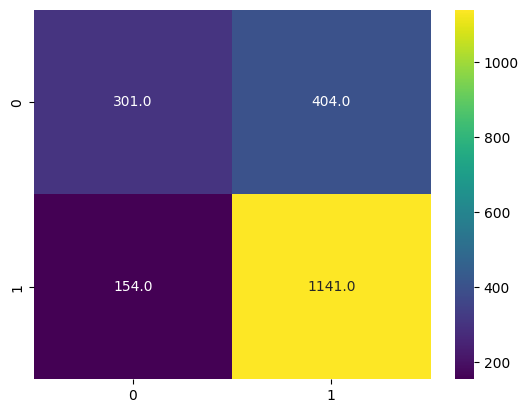

In [112]:
sns.heatmap(cm, annot= True, cmap = 'viridis', fmt = '.1f')

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52       705
           1       0.74      0.88      0.80      1295

    accuracy                           0.72      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.71      0.72      0.70      2000

